In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
# import collections

<h1 style="color:#00bbae">Veri Seti </h1>
<span>anime.csv,rating.csv </span>
<p>Veri  seti <a href="https://myanimelist.net">myanimelist.net</a> üzerinden animeler ve animelerin özelliklerini ile kullanıcıların hangi animelere kaç puan verdiğini içeriyor </p>
<span>anime.csv içeriği</span>
<ol> 
  <li>anime_id</li>
  <li>name </li>
  <li>genre </li>
  <li>type </li>
  <li>episodes </li>
  <li>rating </li>
  <li>members </li>
</ol>
<hr>
<span>rating.csv içeriği</span>
<ol> 
  <li>user_id</li>
  <li>anime_id </li>
  <li>rating </li>
</ol>


In [2]:
anime=pd.read_csv("anime.csv")   #Dosya Okuma
rating=pd.read_csv("rating.csv")

<p>Okuduğumuz Veri Çerçevelerini Kontrol edelim</p>

In [3]:
anime.head(4) 

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572


In [4]:
rating.head(4)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1


<p>Elimizdeki Datayı Biraz Düzenleyelim </p>

In [5]:
print(anime.info())
print(rating.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


In [6]:
print(anime.isnull().sum())
#null yada NaN değer var mı bakıyoruz 
print(rating.isnull().sum())

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64
user_id     0
anime_id    0
rating      0
dtype: int64


<p>Excel Dosyasına bakarken rating dosyasında bazı kullanıcıların -1 girdiğini gördüm ve bunları silme kararı verdim
   Anime dosyasında ise bazı animelerin bölüm sayıları bilinmiyor olarak gözükmüş aşağıda yapcağım analiz kısımlarında problem olmasın diye onları da sildim
 </p>

In [7]:
rating_df=rating.replace(to_replace=-1,value=np.nan)  
anime_df=anime.replace(to_replace="Unknown",value=np.nan) 

In [8]:
anime_df.dropna(how="any",axis=0,inplace=True)
rating_df.dropna(how="any",axis=0,inplace=True)

#Tekrardan boş değer var mı kontrol ediyorum
print(anime_df.isnull().sum())
print(rating_df.isnull().sum())

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64
user_id     0
anime_id    0
rating      0
dtype: int64


In [9]:
anime_df=anime_df.astype({"episodes":int}) #episodes "Unknown" değerler yüzünden object olarak tanımlanmıştı bunun türünü int olarak değiştiriyorum 

In [10]:
#Elimizdeki verinin Büyüklüğüne bakıyorum
print(anime_df.shape)
print(rating_df.shape)
print(rating.info())

(11830, 7)
(6337241, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


<h1 style="color:#00bbae">Analiz Kısmı</h1>

<h4> Veriye Sorabileceğimiz sorular nelerdir? <h4>
<ol>
  <li>Derecelendirme ve Tip Arasındaki İlişki nasıl? </li>
  <li>Tipe göre ortalama değerleri ve standart sapmaları nedir? </li>
  <li>Tür dağılımı nasıl? </li>
  <li>Ne kadar insan anime değerlendiriyor?</li>
  <li>Rating oranları oy kullanan insan sayısı ile nasıl bir orantıya sahip? </li>
  <li>Rating oranları bölüm sayıları ile nasıl bir orantıya sahip? </li>

<h5> Derecelendirme ve Tip Arasındaki İlişki <h5>

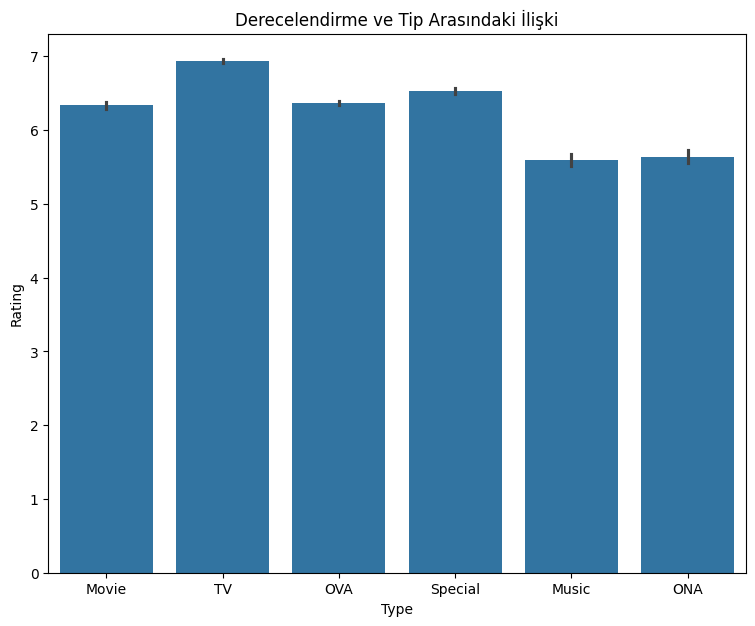

In [11]:
plt.figure(figsize = (9,7))
sns.barplot(data = anime_df, x = "type", y = "rating")
plt.title("Derecelendirme ve Tip Arasındaki İlişki", size = 12)
plt.xlabel("Type")
plt.ylabel("Rating")
plt.show()

In [12]:
anime_ax=anime_df.groupby(by="type").apply(lambda x:[x["members"].mean(),x["members"].std(),x["rating"].mean(),x["rating"].std()]).apply(pd.Series)
anime_ax.columns=["ortalama.people","standartSapma.people","ortalama.rating","standartSapma.rating"]
anime_ax

C:\Users\gucsa\AppData\Local\Temp\ipykernel_10788\2493044724.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  anime_ax=anime_df.groupby(by="type").apply(lambda x:[x["members"].mean(),x["members"].std(),x["rating"].mean(),x["rating"].std()]).apply(pd.Series)


,ortalama.people,standartSapma.people,ortalama.rating,standartSapma.rating
type,,,,
Movie,10568.609832,31393.230487,6.334486,1.207021
Music,1314.455852,4552.445070,5.588665,0.959398
ONA,4449.237624,12876.855839,5.640479,1.125504
OVA,6065.670364,15162.589122,6.371087,0.859524
Special,7709.295495,15591.015211,6.525453,0.884138
TV,44635.572029,90545.430554,6.929487,0.830774


<h5> Animelerin Tür Dağılımı </h5>

In [13]:

tür = []
for items in anime_df["genre"]:
    for item in items.split(","):
        tür.append(item.strip())  # strip, boşlukları temizler

# Türlerin sıklığını sayma
tür_dict = {}
for item in tür:
    tür_dict[item] = tür_dict.get(item, 0) + 1  # türü sayıyoruz

# Sayımları sıralama
tür_dict_sorted = dict(sorted(tür_dict.items(), key=lambda item: item[1], reverse=True))

# Pandas Series oluşturma
tür_df = pd.Series(tür_dict_sorted)




#Kaç tane tür bulmak için 
# for item in list(anime_df["genre"].index):
#     anime_df.loc[item, "genre"] = anime_df.loc[item, "genre"] + ","
# tür=[]
# for items in anime_df["genre"].sum().split(","):
#     tür.append(items.strip()) #strip yapmamız sebebi önceki denememde bazı Türlerin başlarında boşluk oluyordu ve aynı türden 2 tane sayım gözüküyordu 

#Yukarda elde ettiğimiz dizide türler dağınıktır yani aynı türden birden fazla vardır bunları ayıklayıp sayılarını elde etmemiz gerek 

# counter =collections.Counter(tür) 

# tür_dict=dict(sorted(dict(counter).items(), key=lambda item: item[1], reverse = True))
# tür_df=pd.Series(data=tür_dict)

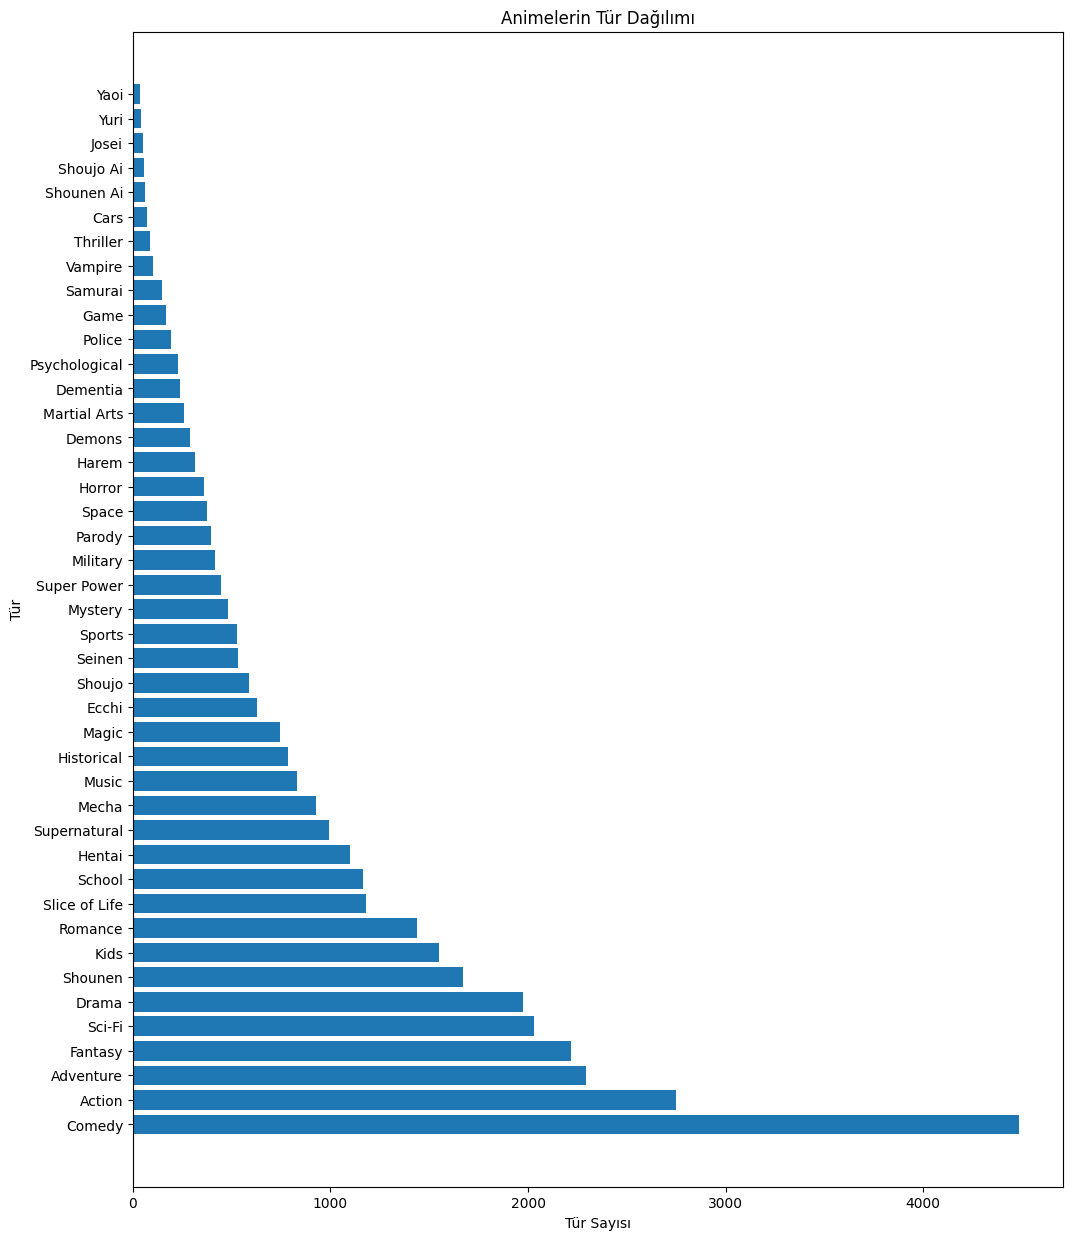

In [14]:
tür_df = tür_df[tür_df.index != " "]

#tür_df.drop(labels=" ",inplace=True)
plt.figure(figsize=(12,15))
plt.barh(tür_df.index,tür_df.values)
plt.title("Animelerin Tür Dağılımı")
plt.ylabel("Tür")
plt.xlabel("Tür Sayısı")
plt.show()

<h5> İnsanlar ne kadar anime değerlendiriyor  </h5>

<Axes: ylabel='Density'>

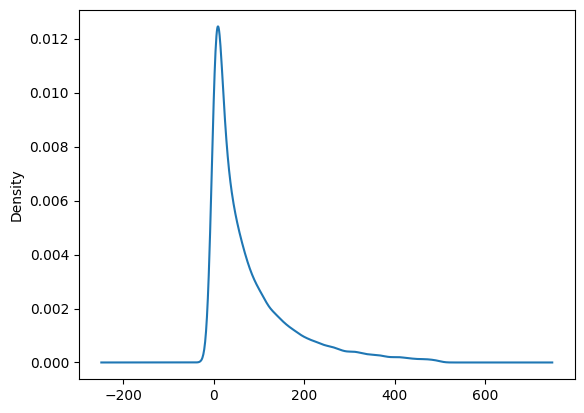

In [15]:
rate=rating_df.groupby(by="user_id")["rating"].count()
rate[rate<500].plot.kde()  #Yoğunluk oranı için 

<h4>Rating oranları  web sitesindeki rating ile elimizdeki rating tablosundaki oranlar </h4>


(array([  16649.,   23150.,   41453.,  104291.,  282806.,  637775.,
        1375287., 1646019., 1254096.,  955715.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

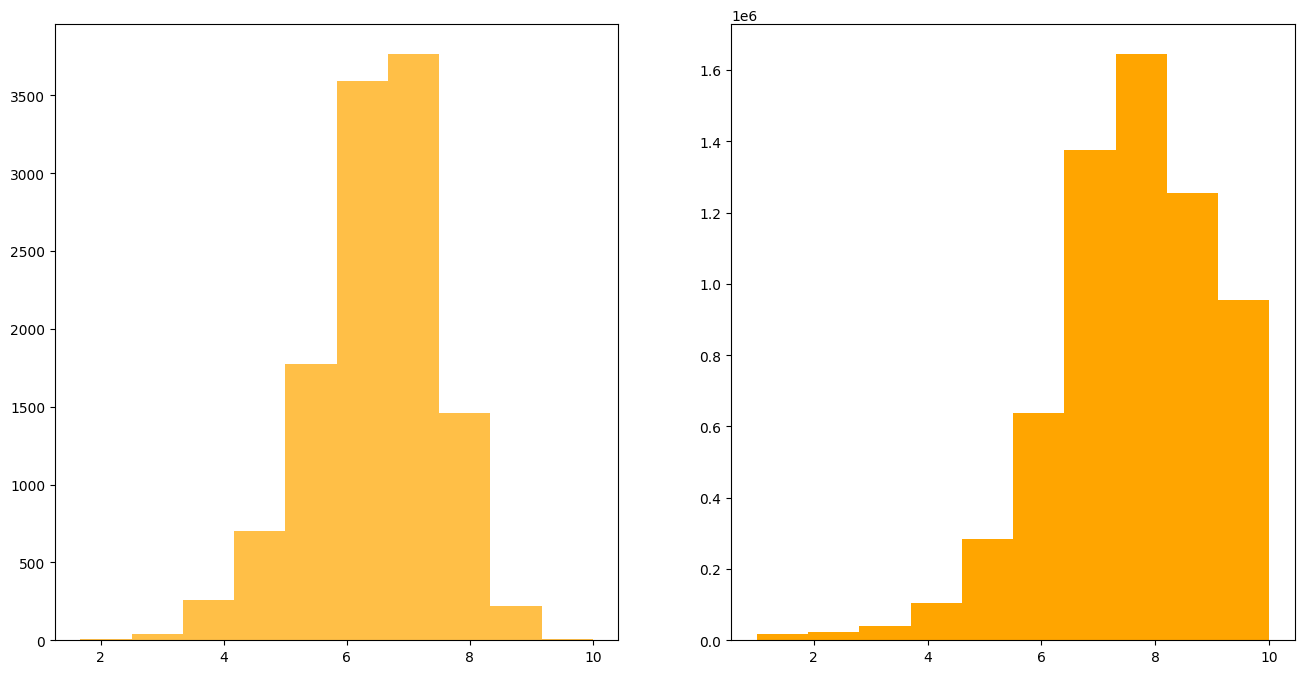

In [16]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.hist(data=anime_df,x="rating",color="#ffbf47") 

plt.subplot(1,2,2)
plt.hist(data=rating_df,x="rating",color="orange") 

<h4> Kişi sayısına göre rating oranların değişimi </h4>

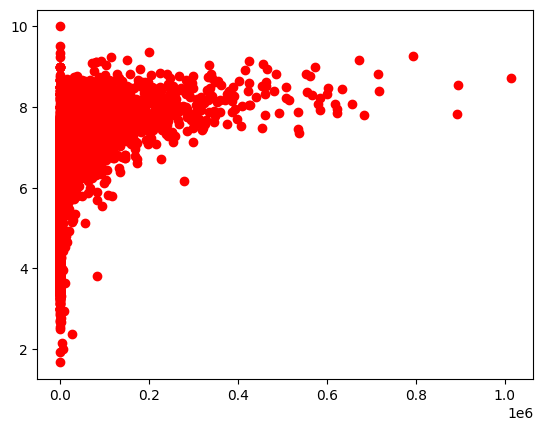

In [17]:
plt.scatter(data=anime_df,x="members",y="rating",c="red") #görüldüğü üzere bazı animeler bir animeyei çok kişi izliyorsa rating  de yüksek olur

Text(0.5, 1.0, 'Movie')

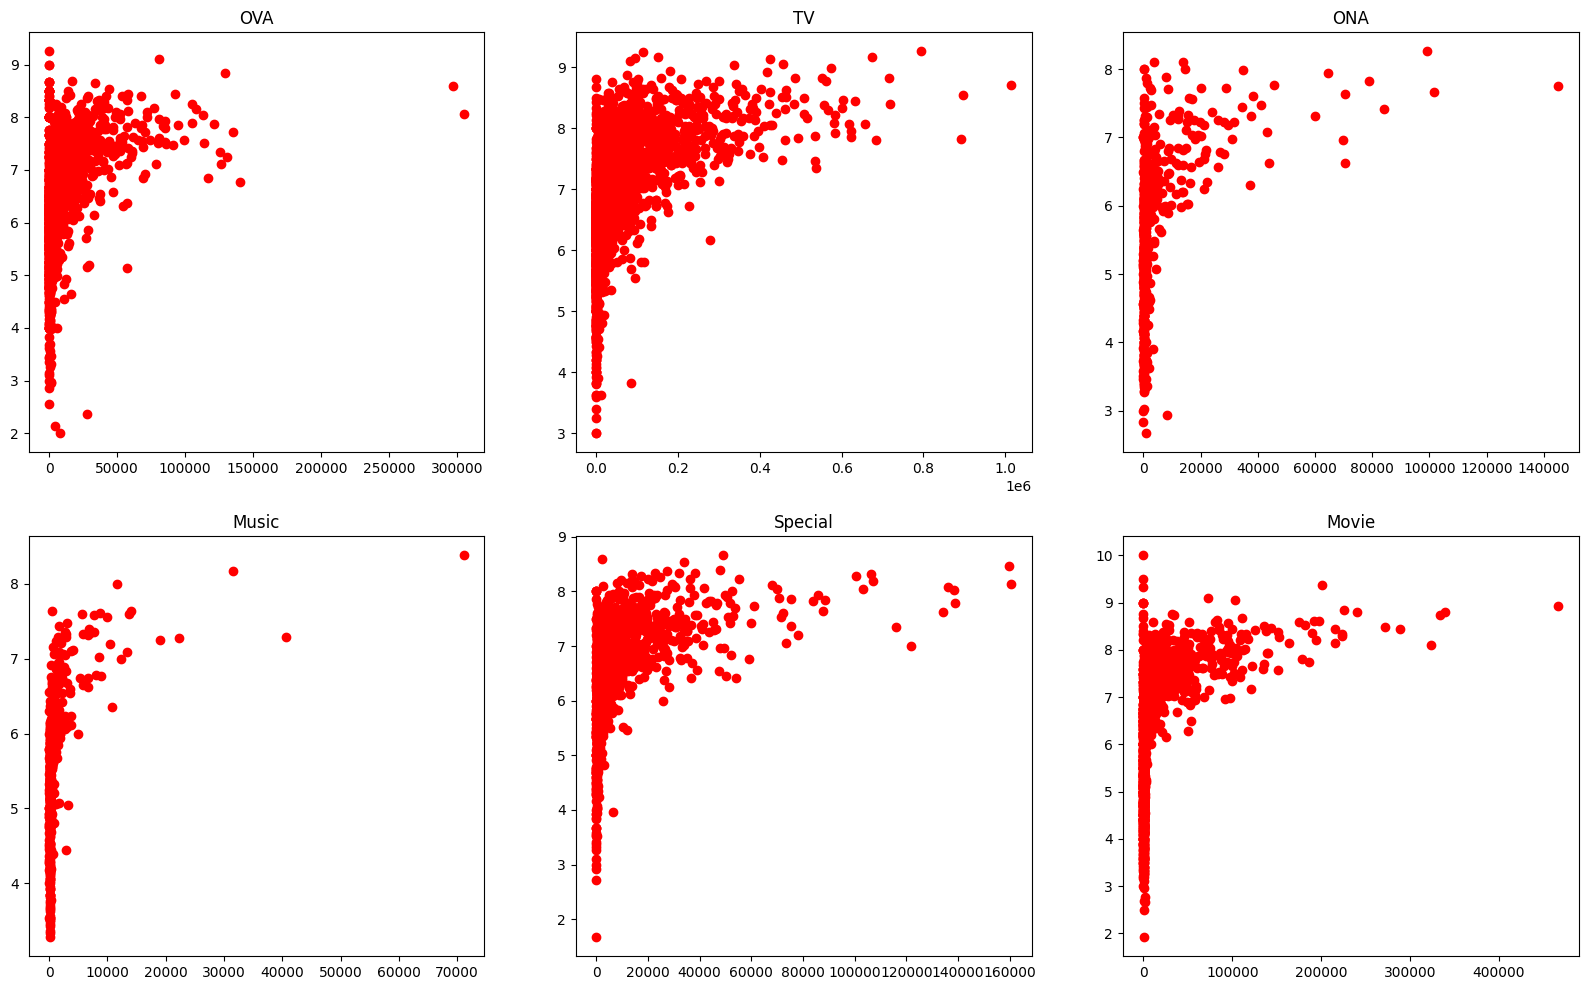

In [18]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
plt.scatter(data=anime_df[anime_df["type"]=="OVA"],x="members",y="rating",c="red")
plt.title("OVA")

plt.subplot(2,3,2)
plt.scatter(data=anime_df[anime_df["type"]=="TV"],x="members",y="rating",c="red")
plt.title("TV")

plt.subplot(2,3,3)
plt.scatter(data=anime_df[anime_df["type"]=="ONA"],x="members",y="rating",c="red")
plt.title("ONA")

plt.subplot(2,3,4)
plt.scatter(data=anime_df[anime_df["type"]=="Music"],x="members",y="rating",c="red")
plt.title("Music")

plt.subplot(2,3,5)
plt.scatter(data=anime_df[anime_df["type"]=="Special"],x="members",y="rating",c="red")
plt.title("Special")

plt.subplot(2,3,6)
plt.scatter(data=anime_df[anime_df["type"]=="Movie"],x="members",y="rating",c="red")
plt.title("Movie")

<h4>Bölüm Sayısına göre rating oranlarının değişimi <h4>

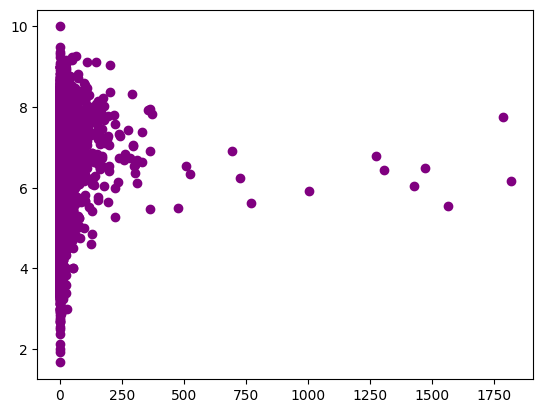

In [19]:
plt.scatter(data=anime_df,x="episodes",y="rating",c="purple")

Text(0.5, 1.0, 'Movie')

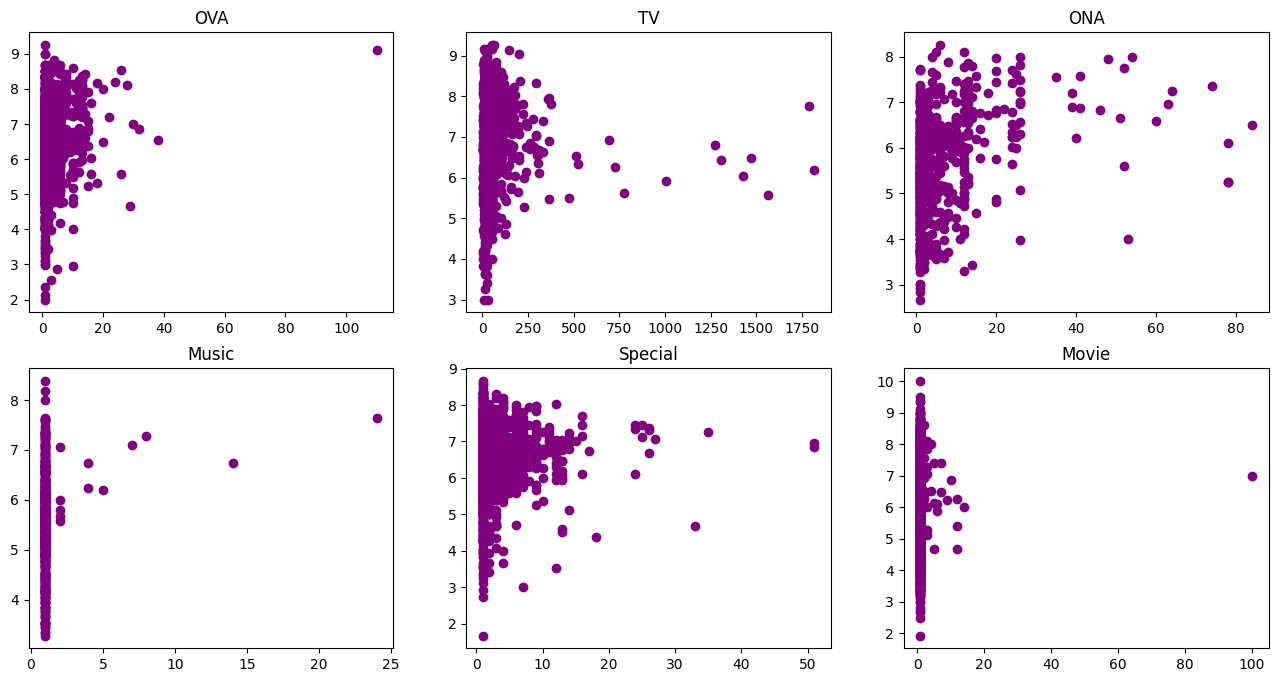

In [20]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(data=anime_df[anime_df["type"]=="OVA"],x="episodes",y="rating",c="purple")
plt.title("OVA")

plt.subplot(2,3,2)
plt.scatter(data=anime_df[anime_df["type"]=="TV"],x="episodes",y="rating",c="purple")
plt.title("TV")

plt.subplot(2,3,3)
plt.scatter(data=anime_df[anime_df["type"]=="ONA"],x="episodes",y="rating",c="purple")
plt.title("ONA")

plt.subplot(2,3,4)
plt.scatter(data=anime_df[anime_df["type"]=="Music"],x="episodes",y="rating",c="purple")
plt.title("Music")

plt.subplot(2,3,5)
plt.scatter(data=anime_df[anime_df["type"]=="Special"],x="episodes",y="rating",c="purple")
plt.title("Special")

plt.subplot(2,3,6)
plt.scatter(data=anime_df[anime_df["type"]=="Movie"],x="episodes",y="rating",c="purple")
plt.title("Movie")


<h1 style="color:#00bbae">Öneri Sistemi </h1>

<h3 style="color:rgb(139, 211, 243)">Öneri Sistemleri Nedir </h3>
<p>Bir kullanıcının tercihlerini tahmin etmeye dayanan sistemlerdir örnek verirsek bir müşterinin ilgilenebileceği elektronik ürünleri bulmak veya izlemek isteyebileceği filmleri bulup onun karşısına çıkarmak</p>
<span>Öneri Sistemlerinde bir sürü sistem vardır benim kullandığım algoritmalar: </span>
<ol>
  <li>Collabrotiv Filtering </li>
  <li>Content-Based Filtering</li>
</ol>
<img src="öneri.png" style="width:600px; height:400px;"  />
<hr>
<a href="https://medium.com/@irmcilingir/öneri-sistemleri-recommendation-systems-28a3f341c0a9">Kaynak</a>

<h4 style="color:rgb(139, 211, 243)"> Collaborativ Filtering </h4>
<p>
  Bunu en kısa özetle anlatmak gerekirse senle aynı kitab,film veya elektronik bir ürünü beğenmiş olan başka bir kullanıcının  beğendiği ürünleri senin karşına çıkarması diyebiliriz . bunun ana fikri ikinizin ortak alanlarının yoğunluğu yüksek ise diğer arkadaşın beğendiği yada aldığı ürünü senin de alma olasılığının yüksek olabileceği düşüncesiyle çalışır 
</p>

In [21]:
from sklearn.decomposition import TruncatedSVD #buna gerek duyma sebebim  Veri setindeki özelliklerin sayısını azaltmak ve daha düşük boyutlu bir temsil elde etmek için kullanılır.

In [22]:
anime_full_data=pd.merge(rating,anime,on="anime_id")  # iki data setinde 'de ortak olan anime_id sütununa göre birletşrime yapılır.
anime_full_data

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,1,24,-1,School Rumble,"Comedy, Romance, School, Shounen",TV,26,8.06,178553
2,1,79,-1,Shuffle!,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...",TV,24,7.31,158772
3,1,226,-1,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,7.85,623511
4,1,241,-1,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV,11,6.69,84395
...,...,...,...,...,...,...,...,...,...
7813722,73515,16512,7,Devil Survivor 2 The Animation,"Action, Demons, Supernatural",TV,13,7.06,101266
7813723,73515,17187,9,Ghost in the Shell: Arise - Border:1 Ghost Pain,"Mecha, Police, Psychological, Sci-Fi",Movie,1,7.64,31747
7813724,73515,22145,10,Kuroshitsuji: Book of Circus,"Comedy, Demons, Fantasy, Historical, Shounen, ...",TV,10,8.37,122895
7813725,73516,790,9,Ergo Proxy,"Mystery, Psychological, Sci-Fi",TV,23,8.03,265005


In [23]:
anime_full_data.groupby("anime_id")["rating_x"].count().sort_values(ascending=False).head()  # anime id si 1575 olan en yüksek ratingi almıştır.

anime_id
1535     39340
11757    30583
16498    29584
1575     27718
226      27506
Name: rating_x, dtype: int64

In [24]:
anime_full_data["rating_x"].replace(to_replace=-1,value=np.nan,inplace=True) # eksik veriler -1 ler nan yapıldı

C:\Users\gucsa\AppData\Local\Temp\ipykernel_10788\104577616.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  anime_full_data["rating_x"].replace(to_replace=-1,value=np.nan,inplace=True) # eksik veriler -1 ler nan yapıldı


In [25]:
anime_full_data["rating_x"].dropna(axis=0,how=any)  # eksik değerlere sahip sütunlar kaldırılacak. NaN sütünlar kaldırılacak

47         10.0
81         10.0
83         10.0
101        10.0
153        10.0
           ... 
7813722     7.0
7813723     9.0
7813724    10.0
7813725     9.0
7813726     9.0
Name: rating_x, Length: 6337239, dtype: float64

In [26]:
rating_crosstab=anime_full_data.pivot_table(values="rating_x",index="user_id",columns="name")


In [27]:
rating_crosstab

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,...,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,◯
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
rating_crosstab.shape

(69600, 9926)

In [29]:
X=rating_crosstab.T # tablonun transpozu alındı
X

user_id,1,2,3,5,7,8,9,10,11,12,...,73507,73508,73509,73510,73511,73512,73513,73514,73515,73516
name,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
&quot;Bungaku Shoujo&quot; Memoire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
&quot;Bungaku Shoujo&quot; Movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xxxHOLiC Kei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xxxHOLiC Movie: Manatsu no Yoru no Yume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xxxHOLiC Rou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
X.replace(to_replace=np.nan,value=0,inplace=True) #TruncatedSVD için NaN değerleri 0 yapıyorum 

In [31]:
 #burada PCA da kullanabilirdim ama internetten baktığım kadarıyla SVD matrisi işlemesi ve analiz etmesi kolay ve daha özenli 
SVD=TruncatedSVD(n_components=16,random_state=17)    # veri seti 16 boyutlu bir matrise dönüştürülüyor gerisi atılacak
resultan_matrix=SVD.fit_transform(X) #kullanıcıların animeye verdiği puanlar 16 yeni bileşen ile gösterilecek eğitim burda var
resultan_matrix.shape

(9926, 16)

In [32]:
# elde ettiğimiz matrisin korelasyon kat sayılarını alıyoruz
cor_mat=np.corrcoef(resultan_matrix)    # kare bir matris oluşturuldu ve iki veri seti arasında doğrusal ilişki belirlendi
cor_mat.shape

(9926, 9926)

In [33]:
movie_names=rating_crosstab.columns 
movie_list=list(movie_names)

In [34]:
def CollaborativeFiltering(movie):
    movieid=movie_list.index(movie)
    corr_movie=cor_mat[movieid]
    recom_movie=list(movie_names[(corr_movie<1.0) & (corr_movie > 0.85)]) # yüzde seksen beş ile yüzde yüz arasında korelasyon olan lar listelenir
    return anime.loc[anime['name'].isin(recom_movie)]

In [35]:
CollaborativeFiltering("Naruto")

,anime_id,name,genre,type,episodes,rating,members
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
200,121,Fullmetal Alchemist,"Action, Adventure, Comedy, Drama, Fantasy, Mag...",TV,51,8.33,600384
440,3588,Soul Eater,"Action, Adventure, Comedy, Fantasy, Shounen, S...",TV,51,8.08,580184
582,269,Bleach,"Action, Comedy, Shounen, Super Power, Supernat...",TV,366,7.95,624055
803,154,Shaman King,"Action, Adventure, Comedy, Drama, Shounen, Sup...",TV,64,7.83,169517


In [36]:
CollaborativeFiltering("Naruto") #favorimdir öneririm netflixde var 

,anime_id,name,genre,type,episodes,rating,members
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
200,121,Fullmetal Alchemist,"Action, Adventure, Comedy, Drama, Fantasy, Mag...",TV,51,8.33,600384
440,3588,Soul Eater,"Action, Adventure, Comedy, Fantasy, Shounen, S...",TV,51,8.08,580184
582,269,Bleach,"Action, Comedy, Shounen, Super Power, Supernat...",TV,366,7.95,624055
803,154,Shaman King,"Action, Adventure, Comedy, Drama, Shounen, Sup...",TV,64,7.83,169517


<h4 style="color:rgb(139, 211, 243)">Content-Based Filtering Systems </h4>
<p>
  Müşterinin aldığı yada beğendiği ürünün benzer özellikteki ürünleri müşterinin karşısına çıkarmak için kullanılıyor .İçeriğe Dayalı Filtreleme fikri, bir ürünü beğendiyseniz bu ürüne benzer başka bir ürünü de beğeneceğinize dayanmaktadır. 
</p>

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [38]:
# gereksiz verileri temizleme işlemi
anime_df=anime.dropna(axis=0,how="any")
anime_df["rating"].replace(to_replace="Unknown",value=0)
anime_df["rating"].replace(to_replace=-1,value=0)
anime_df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


<strong style="color:rgb(139, 211, 243)">TF-IDF Nedir? </strong>
<p> TF-IDF kavramı IR (information retrieval, bilgi getirimi) gibi konuların altında bir sıralama (ranking) algoritması olarak sıkça geçmektedir.

İngilizcedeki Term Frequency – Inverse Document Frequency (Terim frekansı – ters metin frekansı) olarak geçen kelimelerin baş harflerinden oluşan terim basitçe bir metinde geçen terimlerin çıkarılması ve bu terimlerin geçtiği miktara göre çeşitli hesapların yapılması üzerine kuruludur.

Klasik olarak TF yani terimlerin kaç kere geçtiğinden daha iyi sonuç verir. Kısaca TF-IDF hesabı sırasında iki kritik sayı bulunmaktadır. Bunlardan birincisi o anda ele alınan dokümandaki terimin sayısı diğeri ise bu terimi külliyatta içeren toplam doküman sayısıdır. </p>
<a href="https://bilgisayarkavramlari.com/2012/10/22/tf-idf/">Kaynak</a>
<hr>
<img src="indir.png" style="width:600px" />

In [39]:

tfvector=TfidfVectorizer(min_df=3,  max_features=None,      #min_df yazım hatalarından kurtulduk
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),  #anime isimleri 1 ,2 veya 3 eklimden oluşmaktadır
            stop_words = 'english') 

In [40]:
anime_df["genre"]=anime_df["genre"].fillna("")
genre_str=anime_df["genre"].str.split(",").astype(str)
tf_matrix=tfvector.fit_transform(genre_str)   #tf-idf matrisine dönüştürüldü

C:\Users\gucsa\AppData\Local\Temp\ipykernel_10788\1026122393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_df["genre"]=anime_df["genre"].fillna("")


In [41]:
tf_matrix.shape

(12017, 1547)

In [42]:
linear_k = linear_kernel(tf_matrix, tf_matrix)  #benzerlik matrisi
linear_k

array([[1.        , 0.02301622, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02301622, 1.        , 0.0253986 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0253986 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]], shape=(12017, 12017))

In [43]:
endeks = pd.Series(anime_df.index, index=anime_df['name']).drop_duplicates() #indis numaralarını almak için 
print("örnek",endeks["Naruto"])  

örnek 841


In [44]:
def ContentBasedFiltering(title, linear_k=linear_k):
    #Kullanıcının Girdiği filmin indexi 
    idx = endeks[title]

    # Benzerlik puanlarını alıyoruz ikili örnek :(id,score)
    linear_k_scores = list(enumerate(linear_k[idx]))

    # yüksek skorları tespit etmek için bir sıralama işleminden geçiriyoruz 
    linear_k_scores = sorted(linear_k_scores, key=lambda x: x[1], reverse=True)

    # burada en yüksek 10 skoru alıyorum 
    linear_k_scores = linear_k_scores[1:11]

    #  burada yukarıda ikili olarak aldımız puanların indislerini ayırıyoruz 
    anime_indices = [i[0] for i in linear_k_scores]

    # çıktı
    return anime.iloc[anime_indices]
    # return pd.DataFrame({'Anime name': anime_df['name'].iloc[anime_indices].values,
    #                              'Rating': anime_df['rating'].iloc[anime_indices].values})

In [45]:
ContentBasedFiltering("Naruto")

,anime_id,name,genre,type,episodes,rating,members
615,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,Unknown,7.94,533578
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1103,32365,Boruto: Naruto the Movie - Naruto ga Hokage ni...,"Action, Comedy, Martial Arts, Shounen, Super P...",Special,1,7.68,16868
1343,10075,Naruto x UT,"Action, Comedy, Martial Arts, Shounen, Super P...",OVA,1,7.58,23465
1472,8246,Naruto: Shippuuden Movie 4 - The Lost Tower,"Action, Comedy, Martial Arts, Shounen, Super P...",Movie,1,7.53,84527
1573,6325,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,"Action, Comedy, Martial Arts, Shounen, Super P...",Movie,1,7.50,83515
2458,19511,Naruto Shippuuden: Sunny Side Battle,"Action, Comedy, Martial Arts, Shounen, Super P...",Special,1,7.26,13014
2996,6946,Mudazumo Naki Kaikaku: The Legend of Koizumi,"Comedy, Game, Parody, Seinen",OVA,3,7.11,8682
7819,8604,Oshiri Kajiri Mushi,"Comedy, Music",Music,1,4.93,495
7617,21833,Higenashi Gogejabaru,"Comedy, Fantasy, Kids, Music",Music,1,5.23,149


In [46]:
ContentBasedFiltering("Bleach")

,anime_id,name,genre,type,episodes,rating,members
946,8247,Bleach Movie 4: Jigoku-hen,"Action, Comedy, Shounen, Super Power, Supernat...",Movie,1,7.75,94074
1131,4835,Bleach Movie 3: Fade to Black - Kimi no Na wo ...,"Action, Comedy, Shounen, Super Power, Supernat...",Movie,1,7.66,122373
175,1604,Katekyo Hitman Reborn!,"Action, Comedy, Shounen, Super Power",TV,203,8.37,258103
2932,12321,Thermae Romae,"Comedy, Historical, Seinen",TV,3,7.13,13444
3925,2811,Soratobu Yuureisen,"Adventure, Drama, Mecha, Sci-Fi",Movie,1,6.85,2634
3982,30379,Nagato Yuki-chan no Shoushitsu: Owarenai Natsu...,"Comedy, Seinen, Slice of Life",OVA,1,6.83,9773
3287,10431,Baka to Test to Shoukanjuu: Matsuri - Sentaku ...,"Comedy, Parody",ONA,1,7.03,18934
3023,2389,Kagaku Ninja-tai Gatchaman,"Action, Adventure, Sci-Fi, Shounen",TV,105,7.10,4802
4783,684,Tenshi no Shippo Chu!,"Fantasy, Magic, Romance",TV,11,6.64,3674
859,16011,Tokyo Ravens,"Comedy, School, Shounen, Super Power, Supernat...",TV,24,7.80,171384
